Hello everyone! It's my first notebook. I didnt want to add a info part because it's not so big notebook. I had %93.73 accuracy on Test set. I hope it's clear to understand. 

# 1. Imports

### 1.1. Import Necessary Libraries

In [1]:
# handle tabular data and matrices 
import numpy as np
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#tensorflow for download dataset and some tensor operations
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # convert oh-enc
#model
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,AvgPool2D

#Regularization
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
#earlystopping,Learning Rate decay
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler


### 1.2. Load Dataset

In [2]:
mnist = tf.keras.datasets.fashion_mnist 

(all_train_images, all_train_labels), (test_images, test_labels) = mnist.load_data()

#divide train dataset as train/dev for training
train_images,train_labels = all_train_images[:50000], all_train_labels[:50000]
dev_images, dev_labels = all_train_images[50000:-1],all_train_labels[50000:-1]

4423680/4422102 [==============================] - 0s 0us/step


# 2. Data Analysis & EDA

### 2.1. Shape

In [3]:
print("Shape of train_images: ",train_images.shape)
print("Shape of train_labels: ",train_labels.shape)

Shape of train_images:  (50000, 28, 28)
Shape of train_labels:  (50000,)


Results show that images has 28x28 piksel and counts are 50k. Labels' count is 50k,too.

Firstly, i want to examine my datas in frame.So using pandas,i'll convert my data to DataFrame. Our data's shape is 3D,but DataFrame must be 2D-input. So we should reshape our datasets in images.

In [4]:
img_w = train_images.shape[1] #cols
img_h = train_images.shape[2] #rows
ch = 1 #channels
img_shape = (img_w,img_h,ch)

### 2.2. General Info about Data

In [5]:
#Reshape images for converting dataframe

df_train_images = pd.DataFrame(train_images.reshape(-1,img_w*img_h*ch))
df_train_labels = pd.DataFrame(train_labels)

#Let's look our datasets

df_train_images.info()
print("\n-----\n")
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 37.4 MB

-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       50000 non-null  uint8
dtypes: uint8(1)
memory usage: 49.0 KB


Let's look the results. **Train images** has 50,000 rows and 784 columns. All datas' type are uint8.And **Train labels** has 50,000 rows and 1 column. And all datas' type are uint8,too.

### 2.3. Statistical Info

In [6]:
df_train_images.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,0.000900,0.006160,0.030940,0.107540,0.253580,0.410060,0.809520,2.248940,5.720840,14.450000,...,34.482800,23.160800,16.517680,17.712160,22.886520,17.888300,8.457380,2.675780,0.804120,0.07320
std,0.100893,0.269673,0.800147,2.558106,4.300201,5.765828,8.236479,14.342265,23.923902,38.234768,...,57.428282,48.814994,41.924385,43.740321,51.888154,45.118352,29.384753,17.143893,8.973965,2.16594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,233.000000,170.00000


We can examine the results more but for now , just dont forget the min and max value. Because we will use the values for Normalization.

In [7]:
#Just examine first 5 rows.
df_train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.4. Missing Values

In [8]:
print(df_train_images.isna().any().sum())
print("\n---\n")
print(df_train_labels.isna().any().sum())

0

---

0


0 and 0 it's mean that train_images and train_labels datasets have no NaN/missing values. That's good. 

### 2.5. Check Labels

In [9]:
print("Labels: ",df_train_labels[0].unique())

Labels:  [9 0 3 2 7 5 1 6 4 8]


Labels' mean is features or type of clothe like t-shirt,dress etc. We can see that 10 features/classes exist. Let's define them in a dictionary. 

In [10]:
'''
    0 = T-shirt/top
    1 = Trouser
    2 = Pullover
    3 = Dress
    4 = Coat
    5 = Sandal
    6 = Shirt
    7 = Sneaker
    8 = Bag
    9 = Ankle boot
'''
clothes_dict = {0:'T-shirt/top', 
               1:'Trouser',
               2:'Pullover',
               3:'Dress',
               4:'Coat',
               5:'Sandal',
               6:'Shirt',
               7:'Sneaker',
               8:'Bag',
               9:'Ankle boot'}


Now we can define a dictionary to show our labels. To get quickly result, define a function.

In [11]:
def get_cloth(index):
    '''
    Input:
    index = index of cloth in dict.
    
    Output:
    return value of the index in dict.
    '''
    
    val = clothes_dict.get(index)
    return val

# Let's write them all for check.

print("\t Clothes\n-----------")
for key in clothes_dict.keys():
    print(key," --> ",get_cloth(key))
    

	 Clothes
-----------
0  -->  T-shirt/top
1  -->  Trouser
2  -->  Pullover
3  -->  Dress
4  -->  Coat
5  -->  Sandal
6  -->  Shirt
7  -->  Sneaker
8  -->  Bag
9  -->  Ankle boot


### 2.6. Class Imbalance

7    5045
8    5032
6    5030
1    5012
5    5004
2    4992
9    4979
3    4979
0    4977
4    4950
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

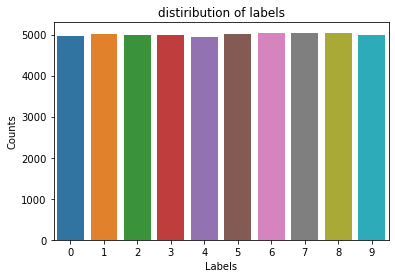

In [12]:
print(df_train_labels.value_counts())



sns.countplot(x=0,data=df_train_labels)
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("distiribution of labels")
plt.show

Our labels' count are very close to each other. So we probably say that dataset has no class imbalance problem. Good!

### 2.7. Data Visualization

Now, we examine some datas in our images dataset.

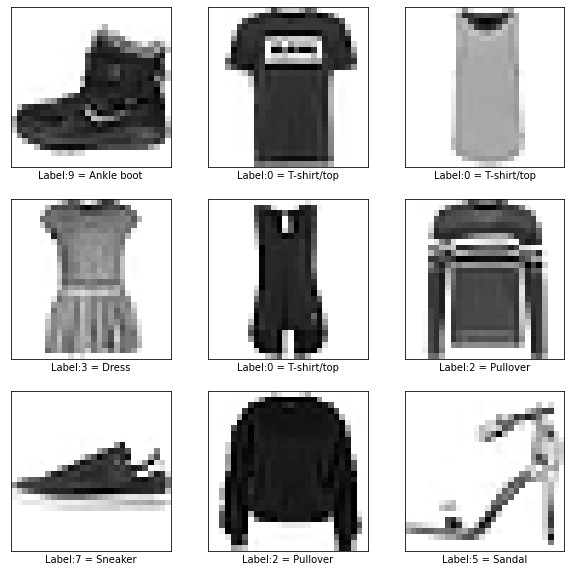

In [13]:
plt.figure(figsize=(10,10))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) #binary - black an white image
  plt.xlabel("Label:{0} = {1}".format(train_labels[i], clothes_dict[train_labels[i]]))
plt.show()


# 3.Preprocessing 

### 3.1. Reshape

In [14]:
train_images_reshaped = train_images.reshape(-1,img_w,img_h,ch)
dev_images_reshaped = dev_images.reshape(-1,img_w,img_h,ch)

print("Train images shape: ",train_images_reshaped.shape)
print("Test images shape: ",dev_images_reshaped.shape)

Train images shape:  (50000, 28, 28, 1)
Test images shape:  (9999, 28, 28, 1)


### 3.2. Data Augmentation

In [15]:
data_generator = ImageDataGenerator(
    featurewise_center = False,  
    samplewise_center = False, 
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False, 
    rotation_range = 15, 
    zoom_range = 0.1,
    width_shift_range = 0.1, 
    height_shift_range = 0.1, 
    horizontal_flip = False,
    vertical_flip = False,
    
)

### 3.3. Normalization

In [16]:
#Normalization 
# x = (x-min) / (max-min) , min = 0,black , max = 255,white
# x = (x - 0 ) / (255 - 0) = x/255. 

train_images_scaled = train_images_reshaped.astype("float32") / 255.
dev_images_scaled = dev_images_reshaped.astype("float32") / 255. 
print("Scaled Training Images Shape: "+str(train_images_scaled.shape))
print("Scaled Test Images Shape: "+str(dev_images_scaled.shape))



Scaled Training Images Shape: (50000, 28, 28, 1)
Scaled Test Images Shape: (9999, 28, 28, 1)


In [17]:
#Apply augmentation.
data_generator.fit(train_images_scaled)

### 3.4. One-hot encoding


In [18]:
#Remember we have 10 labels(classes).
print("\tBefore One-hot encoding")
print("Test Images Shape : "+str(train_labels.shape)+" Value:"+str(train_labels))
print("Test Labels Shape : "+str(dev_labels.shape)+" Value:"+str(dev_labels))

print("\n\tAfter One-hot encoding")

train_labels_oh_enc = to_categorical(train_labels,10)
dev_labels_oh_enc = to_categorical(dev_labels,10)

print("Test Images Shape : "+str(train_labels_oh_enc.shape)+" Value:"+str(train_labels_oh_enc[0]))
print("Test Labels Shape : "+str(dev_labels_oh_enc.shape)+" Value:"+str(dev_labels_oh_enc[1]))



	Before One-hot encoding
Test Images Shape : (50000,) Value:[9 0 0 ... 5 1 7]
Test Labels Shape : (9999,) Value:[9 2 1 ... 1 3 0]

	After One-hot encoding
Test Images Shape : (50000, 10) Value:[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Test Labels Shape : (9999, 10) Value:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# 4. Model

In [19]:
input_shape = img_shape
batch_size = 64
epoch = 15

### 4.1. Define Blocks

In [20]:
def base_layer(filter,input_shape):
  model = Sequential([
                      Conv2D(filters=filter,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape)
  ],name='InitLayer')
  return model
def conv_layer(filter):
  model = Sequential([
                      Conv2D(filters=filter,kernel_size=(3,3),padding='same',activation='relu'),
                      Conv2D(filters=filter,kernel_size=(3,3),padding='same',activation='relu'),
                      BatchNormalization(),
                      MaxPool2D(pool_size=(2,2))
  ])
  return model
def dense_layer(unit,dropout_rate):
  model = Sequential([
                      Dense(units=unit,activation='relu'),
                      BatchNormalization(),
                      Dropout(dropout_rate)
  ])
  return model
def output_layer(classes):
  model = Sequential([
                      Dense(classes, activation='softmax')
  ],name='OutputLayer')
  return model

### 4.2. Create Model

Let's create our model by using defining blocks.

In [21]:
def yeniModelOlustur(input_shape=img_shape):
  model = Sequential([
                      base_layer(16,input_shape),
                      Conv2D(16,3,padding='same',activation='relu'),
                      conv_layer(32),
                      Dropout(0.1),
                      conv_layer(64),
                      Dropout(0.2),
                      conv_layer(128),
                      Dropout(0.25),
                      conv_layer(256),
                      Conv2D(256,3,padding='same',activation='relu'),
                      Dropout(0.3),
                      MaxPool2D(pool_size=(2,2),padding='same'),
                      Flatten(),
                      dense_layer(128,0.6),
                      dense_layer(64,0.4),
                      output_layer(10)
  ])
  return model

### 4.3. Define Metrics and Algorithms

In [22]:
m = yeniModelOlustur()
m.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
m.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InitLayer (Sequential)       (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
sequential (Sequential)      (None, 14, 14, 32)        14016     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 7, 7, 64)          55680     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 3, 3, 128)        

### 4.4. Train

In [23]:
train_images_final, dev_images_final = train_images_scaled,dev_images_scaled
history = m.fit(train_images_final,train_labels_oh_enc,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(dev_images_final,dev_labels_oh_enc))


Epoch 1/15
782/782 [==============================] - 9s 12ms/step - loss: 0.8956 - accuracy: 0.6923 - val_loss: 0.5306 - val_accuracy: 0.8159
Epoch 2/15
782/782 [==============================] - 9s 11ms/step - loss: 0.4632 - accuracy: 0.8467 - val_loss: 0.3211 - val_accuracy: 0.8879
Epoch 3/15
782/782 [==============================] - 8s 11ms/step - loss: 0.3814 - accuracy: 0.8758 - val_loss: 0.3278 - val_accuracy: 0.8847
Epoch 4/15
782/782 [==============================] - 8s 11ms/step - loss: 0.3338 - accuracy: 0.8900 - val_loss: 0.3490 - val_accuracy: 0.8833
Epoch 5/15
782/782 [==============================] - 8s 11ms/step - loss: 0.3074 - accuracy: 0.8990 - val_loss: 0.2955 - val_accuracy: 0.8946
Epoch 6/15
782/782 [==============================] - 8s 10ms/step - loss: 0.2875 - accuracy: 0.9058 - val_loss: 0.2415 - val_accuracy: 0.9168
Epoch 7/15
782/782 [==============================] - 8s 11ms/step - loss: 0.2610 - accuracy: 0.9151 - val_loss: 0.2912 - val_accuracy: 0.9033

### 4.5. Evaluation

In [24]:
test_labels_oh_enc = to_categorical(test_labels,10)
predict_acc = m.evaluate(test_images.reshape(-1,28,28,1).astype("float32")/255.,test_labels_oh_enc)
print('\n\t  Accuracy Rates\n'+
      '\t--------------------\n'+
      'Train: ',history.history["accuracy"][-1],
      '\nDev: ',history.history['val_accuracy'][-1],
      '\nTest: ',predict_acc[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.9232

	  Accuracy Rates
	--------------------
Train:  0.9434000253677368 
Dev:  0.9296929836273193 
Test:  0.9232000112533569


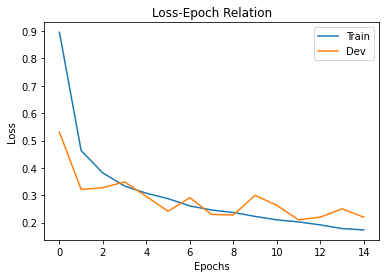

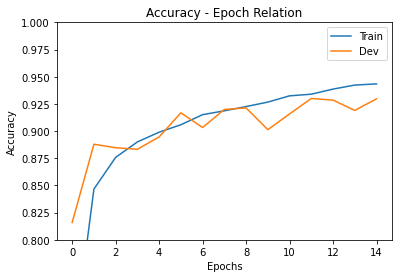

In [25]:
#let's visualize
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss-Epoch Relation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Dev"])
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy - Epoch Relation")
plt.legend(["Train","Dev"])
plt.ylim(0.8,1)
plt.show()



# 5. Fine-Tuning Model

### 5.1. EarlyStopping

In [26]:
checkpoint_fm = ModelCheckpoint("fashion_mnist_model.h5", save_best_only=True)

early_stopping_fm = EarlyStopping(patience=10, restore_best_weights=True)


### 5.2. Learning Rate Decay

In [27]:
#Learning Rate Decay as Exponential
def exponential_decay(learning_rate, decay_step):
    def exponential_decay_fm(epoch):
        return learning_rate * 0.1 **(epoch / decay_step)
    return exponential_decay_fm

exponential_decay_fm = exponential_decay(0.01, 10)
lr_scheduler = LearningRateScheduler(exponential_decay_fm)

### 5.3. Train Again

In [28]:
history = m.fit(train_images_final,train_labels_oh_enc,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(dev_images_final,dev_labels_oh_enc),
                callbacks=[checkpoint_fm, early_stopping_fm, lr_scheduler])



Epoch 1/15
782/782 [==============================] - 8s 10ms/step - loss: 0.4633 - accuracy: 0.8481 - val_loss: 0.3574 - val_accuracy: 0.8798
Epoch 2/15
782/782 [==============================] - 8s 11ms/step - loss: 0.3254 - accuracy: 0.8947 - val_loss: 0.2809 - val_accuracy: 0.9018
Epoch 3/15
782/782 [==============================] - 8s 11ms/step - loss: 0.2822 - accuracy: 0.9078 - val_loss: 0.2491 - val_accuracy: 0.9156
Epoch 4/15
782/782 [==============================] - 9s 11ms/step - loss: 0.2513 - accuracy: 0.9168 - val_loss: 0.2229 - val_accuracy: 0.9239
Epoch 5/15
782/782 [==============================] - 8s 10ms/step - loss: 0.2252 - accuracy: 0.9260 - val_loss: 0.2134 - val_accuracy: 0.9255
Epoch 6/15
782/782 [==============================] - 8s 11ms/step - loss: 0.2046 - accuracy: 0.9322 - val_loss: 0.2137 - val_accuracy: 0.9266
Epoch 7/15
782/782 [==============================] - 9s 11ms/step - loss: 0.1824 - accuracy: 0.9392 - val_loss: 0.2134 - val_accuracy: 0.9287

### 5.4. Evaluation

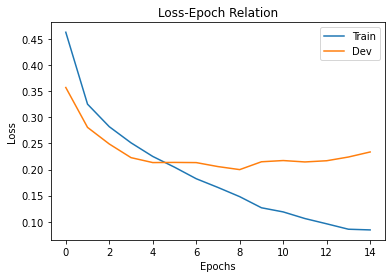

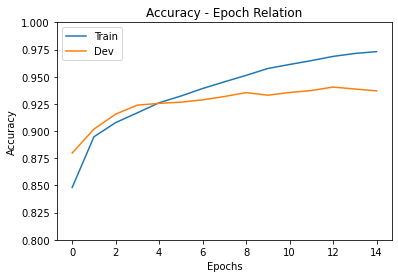

313/313 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.9353

	  Accuracy oranları
	--------------------
Train:  0.9730799794197083 
Dev:  0.9369937181472778 
Test:  0.9352999925613403


In [29]:
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss-Epoch Relation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Dev"])
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy - Epoch Relation")
plt.legend(["Train","Dev"])
plt.ylim(0.8,1)
plt.show()



predict_acc = m.evaluate(test_images.reshape(-1,28,28,1).astype("float32")/255.,test_labels_oh_enc)
print('\n\t  Accuracy oranları\n'+
      '\t--------------------\n'+
      'Train: ',history.history["accuracy"][-1],
      '\nDev: ',history.history['val_accuracy'][-1],
      '\nTest: ',predict_acc[1])